In [1]:
import sys
import os

import json
import pandas as pd


In [67]:

path = "../FEL"
#path="../subsampled_fasta"

files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL_internal.json")]
files

['../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_118.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_8.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_17.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_58.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_142.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_11.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_54.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_47.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_4.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_107.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refseq_cds_CodonAligned.fas_subsampled_114.fasta_codon.alignment.FEL.json',
 '../FEL/TP53_refse

In [68]:
data_dict = {}

pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    count = 0
    for item in MLE:
        if float(item[4] < 0.1): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
            #end if
        #end if
    #end for
    return count
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    count = 0
    for item in MLE:
        if float(item[4] < 0.1): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
            #end if
        #end if
    #end for
    return count
#end method

count = 1

for filename in files:
    if os.stat(filename).st_size == 0: continue
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    num_seqs = json_data["input"]["number of sequences"]
    print(filename.split("/")[-1], num_seqs)
    
    positive_sites = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    count += 1
#end for
    
    
    

TP53_refseq_cds_CodonAligned.fas_subsampled_118.fasta_codon.alignment.FEL.json 87
TP53_refseq_cds_CodonAligned.fas_subsampled_8.fasta_codon.alignment.FEL.json 196
TP53_refseq_cds_CodonAligned.fas_subsampled_17.fasta_codon.alignment.FEL.json 78
TP53_refseq_cds_CodonAligned.fas_subsampled_58.fasta_codon.alignment.FEL.json 146
TP53_refseq_cds_CodonAligned.fas_subsampled_142.fasta_codon.alignment.FEL.json 64
TP53_refseq_cds_CodonAligned.fas_subsampled_11.fasta_codon.alignment.FEL.json 88
TP53_refseq_cds_CodonAligned.fas_subsampled_54.fasta_codon.alignment.FEL.json 150
TP53_refseq_cds_CodonAligned.fas_subsampled_47.fasta_codon.alignment.FEL.json 157
TP53_refseq_cds_CodonAligned.fas_subsampled_4.fasta_codon.alignment.FEL.json 200
TP53_refseq_cds_CodonAligned.fas_subsampled_107.fasta_codon.alignment.FEL.json 97
TP53_refseq_cds_CodonAligned.fas_subsampled_114.fasta_codon.alignment.FEL.json 91
TP53_refseq_cds_CodonAligned.fas_subsampled_2.fasta_codon.alignment.FEL.json 202
TP53_refseq_cds_Codon

TP53_refseq_cds_CodonAligned.fas_subsampled_7.fasta_codon.alignment.FEL.json 197
TP53_refseq_cds_CodonAligned.fas_subsampled_44.fasta_codon.alignment.FEL.json 160
TP53_refseq_cds_CodonAligned.fas_subsampled_12.fasta_codon.alignment.FEL.json 164
TP53_refseq_cds_CodonAligned.fas_subsampled_141.fasta_codon.alignment.FEL.json 65
TP53_refseq_cds_CodonAligned.fas_subsampled_48.fasta_codon.alignment.FEL.json 156
TP53_refseq_cds_CodonAligned.fas_subsampled_14.fasta_codon.alignment.FEL.json 190
TP53_refseq_cds_CodonAligned.fas_subsampled_108.fasta_codon.alignment.FEL.json 96
TP53_refseq_cds_CodonAligned.fas_subsampled_135.fasta_codon.alignment.FEL.json 70
TP53_refseq_cds_CodonAligned.fas_subsampled_126.fasta_codon.alignment.FEL.json 79
TP53_refseq_cds_CodonAligned.fas_subsampled_66.fasta_codon.alignment.FEL.json 138
TP53_refseq_cds_CodonAligned.fas_subsampled_29.fasta_codon.alignment.FEL.json 175
TP53_refseq_cds_CodonAligned.fas_subsampled_75.fasta_codon.alignment.FEL.json 129
TP53_refseq_cds_C

In [63]:
data_dict

{1: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_127.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 78,
  'negative_sites': 279,
  'positive_sites': 3},
 2: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_112.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 93,
  'negative_sites': 281,
  'positive_sites': 4},
 3: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_129.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 76,
  'negative_sites': 276,
  'positive_sites': 2},
 4: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_14.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 190,
  'negative_sites': 321,
  'positive_sites': 3},
 5: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_21.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 183,
  'negative_sites': 320,
  'positive_sites': 3},
 6: {'Filename': 'TP53_refseq_cds_CodonAligned.fas_subsampled_5.fasta_codon.alignment.FEL_internal.json',
  'num_seqs': 199,


In [69]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
#df.columns = ["Filename", "Num_Seqs", "Negative_Sites", "Positive_Sites"]
#df.rename(columns={'gdp':'log(gdp)'}, inplace=True)
#df.columns
df


,Filename,num_seqs,negative_sites,positive_sites
1,TP53_refseq_cds_CodonAligned.fas_subsampled_11...,87,349,3
2,TP53_refseq_cds_CodonAligned.fas_subsampled_8....,196,359,3
3,TP53_refseq_cds_CodonAligned.fas_subsampled_17...,78,311,2
4,TP53_refseq_cds_CodonAligned.fas_subsampled_58...,146,350,1
5,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,64,337,1
...,...,...,...,...
139,TP53_refseq_cds_CodonAligned.fas_subsampled_13...,66,335,2
140,TP53_refseq_cds_CodonAligned.fas_subsampled_23...,181,357,3
141,TP53_refseq_cds_CodonAligned.fas_subsampled_30...,174,351,1
142,TP53_refseq_cds_CodonAligned.fas_subsampled_87...,117,347,4


In [70]:
df.sort_values(by=['num_seqs'], ascending=False)

,Filename,num_seqs,negative_sites,positive_sites
82,TP53_refseq_cds_CodonAligned.fas_subsampled_0....,204,361,2
111,TP53_refseq_cds_CodonAligned.fas_subsampled_1....,203,361,2
12,TP53_refseq_cds_CodonAligned.fas_subsampled_2....,202,360,4
45,TP53_refseq_cds_CodonAligned.fas_subsampled_3....,201,364,2
9,TP53_refseq_cds_CodonAligned.fas_subsampled_4....,200,357,3
...,...,...,...,...
139,TP53_refseq_cds_CodonAligned.fas_subsampled_13...,66,335,2
120,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,65,329,1
5,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,64,337,1
37,TP53_refseq_cds_CodonAligned.fas_subsampled_14...,63,327,2


<AxesSubplot:xlabel='num_seqs'>

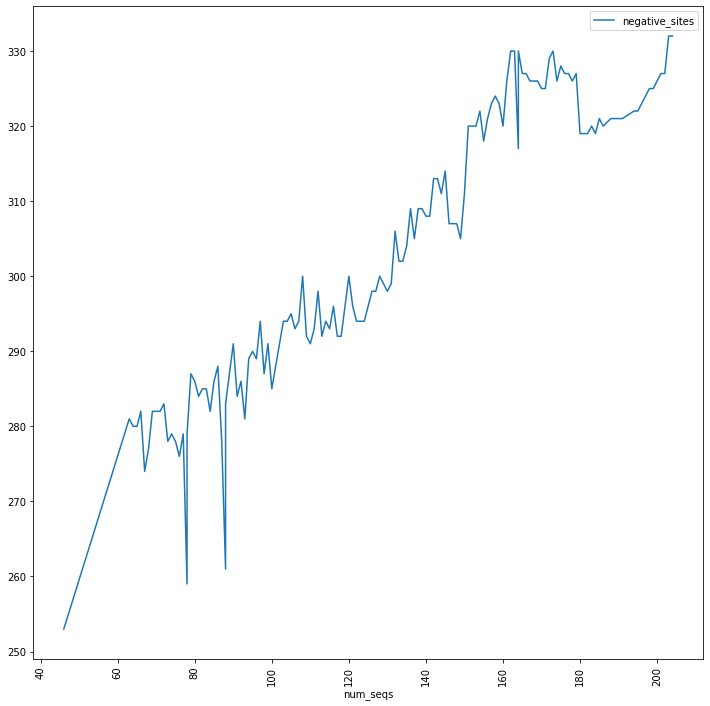

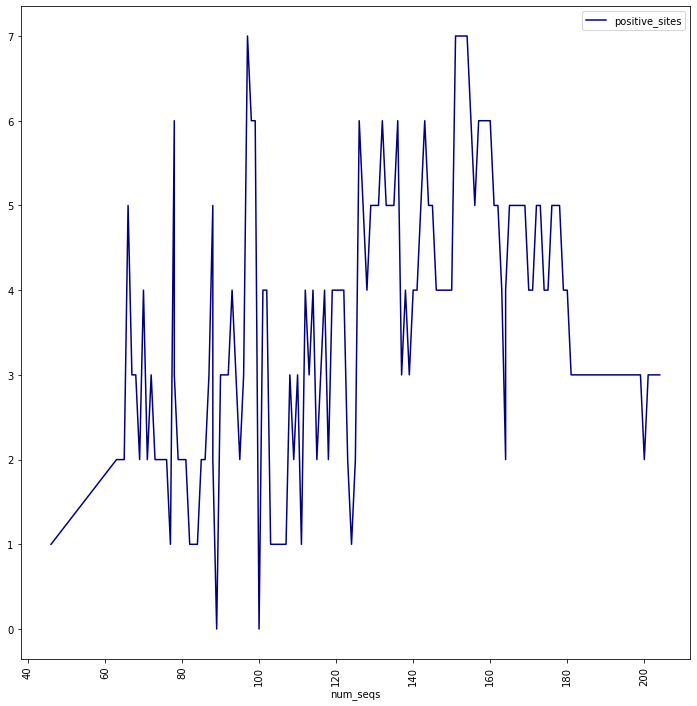

In [66]:
#df.sort_values(by=['col1'])
import matplotlib as plt

#plt.xticks(rotation=90)
df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", y="negative_sites", x="num_seqs", rot=90, figsize=(12,12))

#df.plot(kind='bar',alpha=0.75, rot=0)
#df.plot(figsize=(3,3));


df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", colormap="jet", y="positive_sites", x="num_seqs", rot=90, figsize=(12,12))
